In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc


In [12]:
def compute_auc_and_std(data, nb_episodes):
    # data = np.load(filepath, allow_pickle=True)
    all_returns = data['episode_rewards']  # shape: (n_seeds, n_episodes)
    # print("all_returns ", all_returns, "\n")
    
    # print("all_returns shape:", all_returns.shape, "\n")
    aucs = []
    for rewards in all_returns:
        returns = rewards[:nb_episodes]
        x = np.arange(len(returns))
        aucs.append(auc(x, returns))

    auc_mean = np.mean(aucs)
    auc_std = np.std(aucs)
    return auc_mean, auc_std



In [13]:
prob = "CartPole"
window_size = 10
nb_episodes = 100

In [14]:
base_path = f"C:\\Users\\nicle\\Desktop\\QRNN-MPC\\Files\\Results\\{prob}"



QRNN-ASGNN-PF: AUC = 19266.17 ± 748.60
QRNN-basic-PF: AUC = 19243.67 ± 786.77
QRNN-random-PF: AUC = 19424.00 ± 531.74
QRNN-RS: AUC = 19418.67 ± 539.29
QRNN-ASGNN-CEM: AUC = 19080.83 ± 1017.06
QRNN-basic-CEM: AUC = 19053.50 ± 1055.71
QRNN-random-CEM: AUC = 19197.00 ± 852.77
50NN-ASGNN-PF: AUC = 19273.83 ± 736.35
50NN-basic-PF: AUC = 858.00 ± 46.67
50NN-random-PF: AUC = 18773.67 ± 1451.45
50NN-RS: AUC = 19245.83 ± 783.71
50NN-ASGNN-CEM: AUC = 19412.00 ± 548.71
50NN-basic-CEM: AUC = 1058.67 ± 50.16
50NN-random-CEM: AUC = 19591.67 ± 294.63
MSENN-ASGNN-PF: AUC = 19356.50 ± 627.20
MSENN-basic-PF: AUC = 19366.00 ± 613.77
MSENN-random-PF: AUC = 19181.17 ± 875.16
MSENN-RS: AUC = 19288.83 ± 701.79
MSENN-ASGNN-CEM: AUC = 18949.50 ± 1073.28
MSENN-basic-CEM: AUC = 19203.33 ± 800.03
MSENN-random-CEM: AUC = 19061.67 ± 1044.16
DQN: AUC = 1404.50 ± 61.16
IV-DQN: AUC = 1544.33 ± 69.46
QR-DQN: AUC = 17289.83 ± 1749.73
A2C: AUC = 4979.00 ± 2158.76
PPO: AUC = 2161.83 ± 101.81


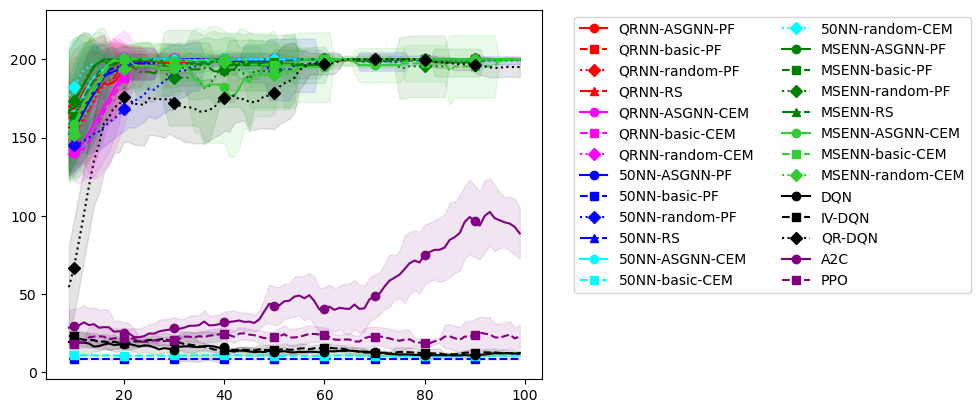

In [15]:
QRNN = {'QRNN-ASGNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_June21.npz',
        # 'QRNN-ASGNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May6.npz',
    'QRNN-basic-PF': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6.npz',
    'QRNN-random-PF': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6.npz',
    'QRNN-RS': f'{base_path}\\{prob}_RS_mid_QRNN_May6.npz',}
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

QRNN_CEM = {'QRNN-ASGNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_June21_CEM.npz',
            # 'QRNN-ASGNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May6_CEM.npz',
    'QRNN-basic-CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6_CEM.npz',
    'QRNN-random-CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6_CEM.npz',}
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ####################################################
FiftyNN = {'50NN-ASGNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_June21.npz',
        #    '50NN-ASGNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May6.npz',
    '50NN-basic-PF': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6.npz',
    '50NN-random-PF': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6.npz',
    '50NN-RS': f'{base_path}\\{prob}_RS_mid_50NN_May6.npz',}
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

FiftyNN_CEM = {'50NN-ASGNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_June21_CEM.npz',
            #    '50NN-ASGNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May6_CEM.npz',
    '50NN-basic-CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6_CEM.npz',
    '50NN-random-CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6_CEM.npz',}
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# ####################################################
MSENN = {'MSENN-ASGNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_June21.npz',
        #  'MSENN-ASGNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6.npz',
    'MSENN-basic-PF': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6.npz',
    'MSENN-random-PF': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6.npz',
    'MSENN-RS': f'{base_path}\\{prob}_RS_mid_MSENN_May6.npz'}
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

MSENN_CEM = {'MSENN-ASGNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_June21_CEM.npz',
            #  'MSENN-ASGNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6_CEM.npz',
    'MSENN-basic-CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6_CEM.npz',
    'MSENN-random-CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6_CEM.npz',}
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ####################################################
# DQN_methods = {'DQN': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DQN_results.npz',
#     'IV-DQN': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_IV_DQN_results.npz',
#     'QR-DQN': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_QR_DQN_results.npz',
#     }
DQN_methods = {'DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_DQN_results.npz',
    'IV-DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_IV_DQN_results.npz',
    'QR-DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_QR_DQN_results.npz',
    }

color = 'black'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in DQN_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    # print("mean_rewards ", data['ep[]'], "\n")
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
########################
RL_methods = {'A2C': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_A2C_results.npz',
    'PPO': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_PPO_results.npz',
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)


# RL_methods = {'A2C': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\CartPole_A2C_results.npz',
#     'PPO': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\CartPole_PPO_results.npz',
#     # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
#     # # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
#     # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
#     # # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
#     # # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
#     # # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
#     }

# A2C_data = np.load(RL_methods['A2C'])
# mean_returns_A2C = A2C_data['mean_rewards'][:nb_episodes]
# std_returns_A2C = A2C_data['std_rewards'][:nb_episodes]
# # Smooth the data
# smoothed_mean_A2C = pd.Series(mean_returns_A2C).rolling(window=window_size).mean()
# smoothed_std_A2C = pd.Series(std_returns_A2C).rolling(window=window_size).std()

# PPO_data = np.load(RL_methods['PPO'])
# mean_returns_PPO = PPO_data['mean_rewards'][:nb_episodes]
# std_returns_PPO = PPO_data['std_rewards'][:nb_episodes]
# # Smooth the data
# smoothed_mean_PPO = pd.Series(mean_returns_PPO).rolling(window=window_size).mean()
# smoothed_std_PPO = pd.Series(std_returns_PPO).rolling(window=window_size).std()

# plt.plot(smoothed_mean_A2C, label='A2C', color='purple')
# plt.fill_between(range(len(smoothed_mean_A2C)), 
#                  smoothed_mean_A2C - smoothed_std_A2C, 
#                  smoothed_mean_A2C + smoothed_std_A2C, 
#                  color='purple', alpha=0.1)
# plt.plot(smoothed_mean_PPO, label='PPO', color='Olive')
# plt.fill_between(range(len(smoothed_mean_PPO)), 
#                  smoothed_mean_PPO - smoothed_std_PPO, 
#                  smoothed_mean_PPO + smoothed_std_PPO, 
#                  color='Olive', alpha=0.1)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)


### Plot subfigures



In [16]:
CP_dict_auc_mean = {}
CP_dict_auc_std = {}


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\Files\\Results\\CartPole\\CartPole_MPC_QRNN_ASGNN_mid_May6.npz'

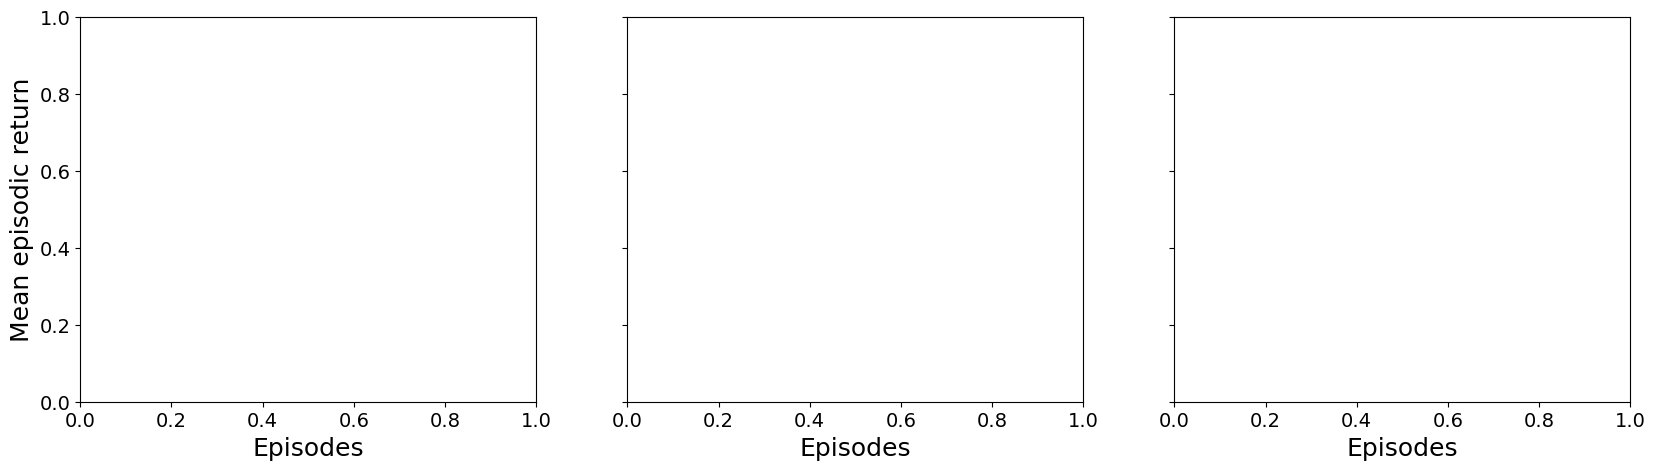

In [ ]:
# fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)
# plt.rcParams.update({'font.size': 20})
# for i, ax in enumerate(axs):
#     # ax.plot([1, 2, 3], [j*(i+1) for j in [1, 4, 9]])
#     # ax.set_title(f"Plot {i+1}", fontsize=20)
#     ax.set_xlabel("Episodes", fontsize=18)
#     ax.tick_params(axis='both', labelsize=14)

# axs[0].set_ylabel("Mean episodic return", fontsize=18)

# QRNN = {'QRNN-ASNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May6.npz',
#     'QRNN-basic-PF': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6.npz',
#     'QRNN-rnd-PF': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6.npz',
#     'QRNN-RS': f'{base_path}\\{prob}_RS_mid_QRNN_May6.npz',}
# color = 'red'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in QRNN.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:nb_episodes]
#     std_rewards = data['std_rewards'][:nb_episodes]
    
#     if len(mean_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
#     if len(std_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
    
#     auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
#     print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
#     CP_dict_auc_mean[label] = auc_mean
#     CP_dict_auc_std[label] = auc_std

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     axs[0].plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     axs[0].fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color=color, alpha=0.1)
#     it += 1
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ############################################################################

# FiftyNN = {'50NN-ASNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May6.npz',
#     '50NN-basic-PF': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6.npz',
#     '50NN-rnd-PF': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6.npz',
#     '50NN-RS': f'{base_path}\\{prob}_RS_mid_50NN_May6.npz',}
# color = 'blue'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in FiftyNN.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:nb_episodes]
#     std_rewards = data['std_rewards'][:nb_episodes]
    
#     if len(mean_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
#     if len(std_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
    
#     auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
#     print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
#     CP_dict_auc_mean[label] = auc_mean
#     CP_dict_auc_std[label] = auc_std

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     axs[0].plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     axs[0].fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color=color, alpha=0.1)
#     it += 1
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ############################################################################

# MSENN = {'MSENN-ASNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6.npz',
#     'MSENN-basic-PF': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6.npz',
#     'MSENN-rnd-PF': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6.npz',
#     'MSENN-RS': f'{base_path}\\{prob}_RS_mid_MSENN_May6.npz'}
# color = 'green'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in MSENN.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:nb_episodes]
#     std_rewards = data['std_rewards'][:nb_episodes]
    
#     if len(mean_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
#     if len(std_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
    
#     auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
#     print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
#     CP_dict_auc_mean[label] = auc_mean
#     CP_dict_auc_std[label] = auc_std

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     axs[0].plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     axs[0].fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color=color, alpha=0.1)
#     it += 1
# # axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

# # from matplotlib.lines import Line2D

# # custom_legend = [
# #     Line2D([0], [0], color='red', lw=2, label='QRNN'),
# #     Line2D([0], [0], color='blue', lw=2, label='50NN'),
# #     Line2D([0], [0], color='green', lw=2, label='MSENN'),
# #     Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=6, label='ASGNN'),
# #     Line2D([0], [0], color='black', marker='s', linestyle='None', markersize=6, label='QRNN-CEM'),
# #     Line2D([0], [0], color='black', marker='^', linestyle='None', markersize=6, label='50NN-CEM')
# # ]

# # axs[0].legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(0.5, -0.2),
# #               ncol=3, fontsize=10, frameon=False)


# ###########################################################

# print("############################################################# \n")

# QRNN_CEM = {'QRNN-ASNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May6_CEM.npz',
#     'QRNN-basic-CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6_CEM.npz',
#     'QRNN-rnd-CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6_CEM.npz',}
# color = 'magenta'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in QRNN_CEM.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:nb_episodes]
#     std_rewards = data['std_rewards'][:nb_episodes]
    
#     if len(mean_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
#     if len(std_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
    
#     auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
#     print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
#     CP_dict_auc_mean[label] = auc_mean
#     CP_dict_auc_std[label] = auc_std

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     axs[1].plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     axs[1].fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color=color, alpha=0.1)
#     it += 1
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ########################################################

# FiftyNN_CEM = {'50NN-ASNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May6_CEM.npz',
#     '50NN-basic-CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6_CEM.npz',
#     '50NN-rnd-CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6_CEM.npz',}
# color = 'aqua'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in FiftyNN_CEM.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:nb_episodes]
#     std_rewards = data['std_rewards'][:nb_episodes]
    
#     if len(mean_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
#     if len(std_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
    
#     auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
#     print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
#     CP_dict_auc_mean[label] = auc_mean
#     CP_dict_auc_std[label] = auc_std

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     axs[1].plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     axs[1].fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color=color, alpha=0.1)
#     it += 1
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# ########################################################

# MSENN_CEM = {'MSENN-ASNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6_CEM.npz',
#     'MSENN-basic-CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6_CEM.npz',
#     'MSENN-rnd-CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6_CEM.npz',}
# color = 'limegreen'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in MSENN_CEM.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:nb_episodes]
#     std_rewards = data['std_rewards'][:nb_episodes]
    
#     if len(mean_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
#     if len(std_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
    
#     auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
#     print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
#     CP_dict_auc_mean[label] = auc_mean
#     CP_dict_auc_std[label] = auc_std

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     axs[1].plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     axs[1].fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color=color, alpha=0.1)
#     it += 1
# # axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

# #############################################################

# print("############################################################# \n")

# DQN_methods = {'DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_DQN_results.npz',
#     'IV-DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_IV_DQN_results.npz',
#     'QR-DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_QR_DQN_results.npz',
#     }

# color = 'black'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in DQN_methods.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:nb_episodes]
#     std_rewards = data['std_rewards'][:nb_episodes]
    
#     if len(mean_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
#     if len(std_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
    
#     # print("mean_rewards ", data['ep[]'], "\n")
#     auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
#     print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
#     CP_dict_auc_mean[label] = auc_mean
#     CP_dict_auc_std[label] = auc_std

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     axs[2].plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     axs[2].fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color=color, alpha=0.1)
#     it += 1
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ########################
# ########################
# RL_methods = {'A2C': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_A2C_results.npz',
#     'PPO': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_PPO_results.npz',
#     # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
#     # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
#     # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
#     # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
#     # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
#     # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
#     }

# color = 'purple'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in RL_methods.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:nb_episodes]
#     std_rewards = data['std_rewards'][:nb_episodes]
    
#     if len(mean_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
#     if len(std_rewards) < nb_episodes:
#         print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
#         continue
    
#     auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
#     print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
#     CP_dict_auc_mean[label] = auc_mean
#     CP_dict_auc_std[label] = auc_std

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     axs[2].plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     axs[2].fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color=color, alpha=0.1)
#     it += 1

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)


# markers = ['o', 's', 'D', '^', 'v', 'x', '*']
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns

# # QRNN random
# color_QRNN_rnd = 'red'
# marker_QRNN_rnd = markers[2]
# linestyle_QRNN_rnd = linestyles[2]
# data = np.load(f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6.npz')
# mean_rewards_QRNN_rnd = data['mean_rewards'][:nb_episodes]
# std_rewards_QRNN_rnd = data['std_rewards'][:nb_episodes]

# auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
# print(f"QRNN-rnd-PF: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# # Smooth the data
# smoothed_mean_QRNN_rnd = pd.Series(mean_rewards_QRNN_rnd).rolling(window=window_size).mean()
# smoothed_std_QRNN_rnd = pd.Series(std_rewards_QRNN_rnd).rolling(window=window_size).std()

# # Plot
# axs[2].plot(smoothed_mean_QRNN_rnd, 
#             label="QRNN-rnd-PF", 
#             color=color_QRNN_rnd,
#             marker=marker_QRNN_rnd,
#             linestyle=linestyle_QRNN_rnd,
#             markevery=10)  # Show markers every 10 points

# # Confidence interval (optional)
# axs[2].fill_between(range(len(mean_rewards_QRNN_rnd)), 
#                     smoothed_mean_QRNN_rnd - smoothed_std_QRNN_rnd, 
#                     smoothed_mean_QRNN_rnd + smoothed_std_QRNN_rnd, 
#                     color=color_QRNN_rnd, alpha=0.1)


# # 50NN_random_CEM
# color_50NN_rnd_CEM = 'aqua'
# marker_50NN_rnd_CEM = markers[2]
# linestyle_50NN_rnd_CEM = linestyles[2]
# data = np.load(f'{base_path}\\{prob}_MPC_50NN_random_mid_May6_CEM.npz')
# mean_rewards_50NN_rnd_CEM = data['mean_rewards'][:nb_episodes]
# std_rewards_50NN_rnd_CEM = data['std_rewards'][:nb_episodes]

# auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
# print(f"50NN-rnd-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# # Smooth the data
# smoothed_mean_50NN_rnd_CEM = pd.Series(mean_rewards_50NN_rnd_CEM).rolling(window=window_size).mean()
# smoothed_std_50NN_rnd_CEM = pd.Series(std_rewards_50NN_rnd_CEM).rolling(window=window_size).std()

# # Plot
# axs[2].plot(smoothed_mean_50NN_rnd_CEM, 
#             label="50NN-rnd-CEM", 
#             color=color_50NN_rnd_CEM,
#             marker=marker_50NN_rnd_CEM,
#             linestyle=linestyle_50NN_rnd_CEM,
#             markevery=10)  # Show markers every 10 points

# # Confidence interval (optional)
# axs[2].fill_between(range(len(mean_rewards_50NN_rnd_CEM)), 
#                     smoothed_mean_50NN_rnd_CEM - smoothed_std_50NN_rnd_CEM, 
#                     smoothed_mean_50NN_rnd_CEM + smoothed_std_50NN_rnd_CEM, 
#                     color=color_50NN_rnd_CEM, alpha=0.1)

# # MSENN_ASGNN_CEM
# color_MSENN_ASGNN_CEM = 'limegreen'
# marker_MSENN_ASGNN_CEM = markers[0]
# linestyle_MSENN_ASGNN_CEM = linestyles[0]
# data = np.load(f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6_CEM.npz')
# mean_rewards_MSENN_ASGNN_CEM = data['mean_rewards'][:nb_episodes]
# std_rewards_MSENN_ASGNN_CEM = data['std_rewards'][:nb_episodes]

# auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
# print(f"MSENN-ASNN-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# # Smooth the data
# smoothed_mean_MSENN_ASGNN_CEM = pd.Series(mean_rewards_MSENN_ASGNN_CEM).rolling(window=window_size).mean()
# smoothed_std_MSENN_ASGNN_CEM = pd.Series(std_rewards_MSENN_ASGNN_CEM).rolling(window=window_size).std()

# # Plot
# axs[2].plot(smoothed_mean_MSENN_ASGNN_CEM, 
#             label="MSENN-ASNN-CEM", 
#             color=color_MSENN_ASGNN_CEM,
#             marker=marker_MSENN_ASGNN_CEM,
#             linestyle=linestyle_MSENN_ASGNN_CEM,
#             markevery=10)  # Show markers every 10 points

# # Confidence interval (optional)
# axs[2].fill_between(range(len(mean_rewards_MSENN_ASGNN_CEM)), 
#                     smoothed_mean_MSENN_ASGNN_CEM - smoothed_std_MSENN_ASGNN_CEM, 
#                     smoothed_mean_MSENN_ASGNN_CEM + smoothed_std_MSENN_ASGNN_CEM, 
#                     color=color_MSENN_ASGNN_CEM, alpha=0.1)



# # axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)
# axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)



QRNN-ASNN-PF: AUC = 19266.17 ± 748.60
QRNN-basic-PF: AUC = 19243.67 ± 786.77
QRNN-rnd-PF: AUC = 19424.00 ± 531.74
QRNN-RS: AUC = 19418.67 ± 539.29
50NN-ASNN-PF: AUC = 19273.83 ± 736.35
50NN-basic-PF: AUC = 858.00 ± 46.67
50NN-rnd-PF: AUC = 18773.67 ± 1451.45
50NN-RS: AUC = 19245.83 ± 783.71
MSENN-ASNN-PF: AUC = 19356.50 ± 627.20
MSENN-basic-PF: AUC = 19366.00 ± 613.77
MSENN-rnd-PF: AUC = 19181.17 ± 875.16
MSENN-RS: AUC = 19288.83 ± 701.79
############################################################# 

QRNN-ASNN-CEM: AUC = 19080.83 ± 1017.06
QRNN-basic-CEM: AUC = 19053.50 ± 1055.71
QRNN-rnd-CEM: AUC = 19197.00 ± 852.77
50NN-ASNN-CEM: AUC = 19412.00 ± 548.71
50NN-basic-CEM: AUC = 1058.67 ± 50.16
50NN-rnd-CEM: AUC = 19591.67 ± 294.63
MSENN-ASNN-CEM: AUC = 18949.50 ± 1073.28
MSENN-basic-CEM: AUC = 19203.33 ± 800.03
MSENN-rnd-CEM: AUC = 19061.67 ± 1044.16
############################################################# 

DQN: AUC = 1404.50 ± 61.16
IV-DQN: AUC = 1544.33 ± 69.46
QR-DQN: AUC = 17

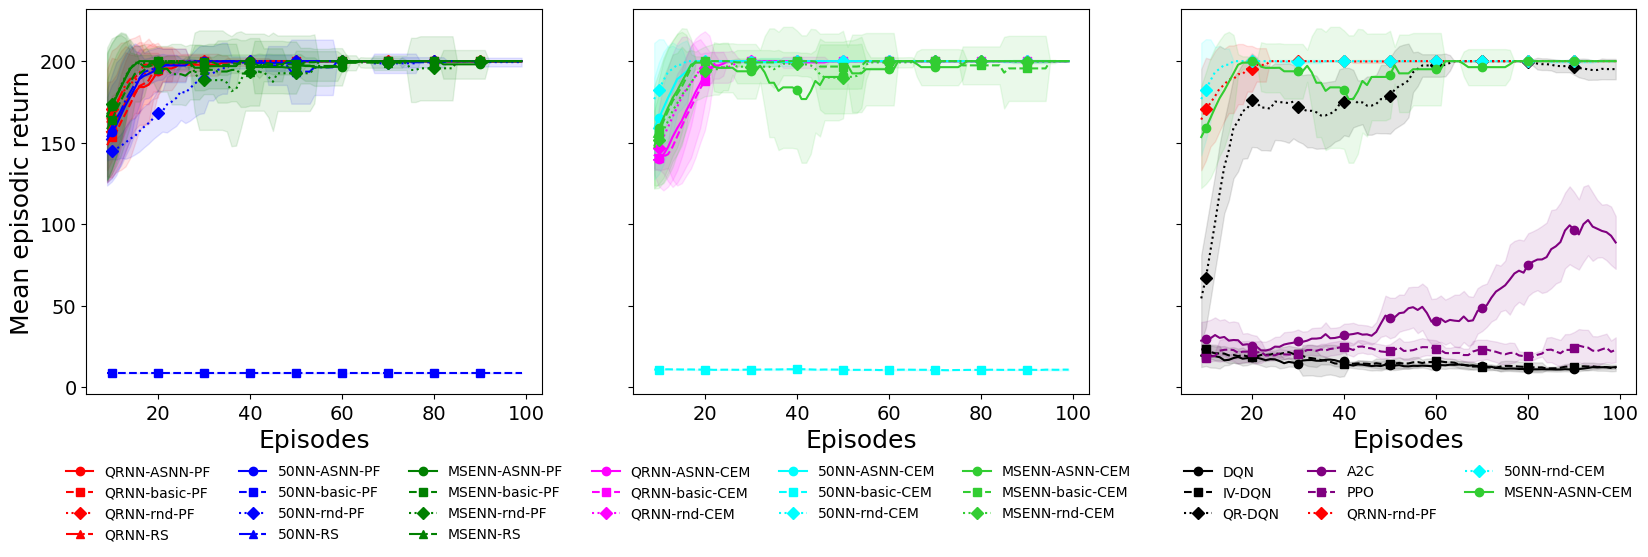

In [18]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)
plt.rcParams.update({'font.size': 20})
for i, ax in enumerate(axs):
    # ax.plot([1, 2, 3], [j*(i+1) for j in [1, 4, 9]])
    # ax.set_title(f"Plot {i+1}", fontsize=20)
    ax.set_xlabel("Episodes", fontsize=18)
    ax.tick_params(axis='both', labelsize=14)

axs[0].set_ylabel("Mean episodic return", fontsize=18)

QRNN = {'QRNN-ASNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_June21.npz',
        # 'QRNN-ASNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May6.npz',
    'QRNN-basic-PF': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6.npz',
    'QRNN-rnd-PF': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6.npz',
    'QRNN-RS': f'{base_path}\\{prob}_RS_mid_QRNN_May6.npz',}
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

FiftyNN = {'50NN-ASNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_June21.npz',
        #    '50NN-ASNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May6.npz',
    '50NN-basic-PF': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6.npz',
    '50NN-rnd-PF': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6.npz',
    '50NN-RS': f'{base_path}\\{prob}_RS_mid_50NN_May6.npz',}
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

MSENN = {'MSENN-ASNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_June21.npz',
        #  'MSENN-ASNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6.npz',
    'MSENN-basic-PF': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6.npz',
    'MSENN-rnd-PF': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6.npz',
    'MSENN-RS': f'{base_path}\\{prob}_RS_mid_MSENN_May6.npz'}
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

# from matplotlib.lines import Line2D

# custom_legend = [
#     Line2D([0], [0], color='red', lw=2, label='QRNN'),
#     Line2D([0], [0], color='blue', lw=2, label='50NN'),
#     Line2D([0], [0], color='green', lw=2, label='MSENN'),
#     Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=6, label='ASGNN'),
#     Line2D([0], [0], color='black', marker='s', linestyle='None', markersize=6, label='QRNN-CEM'),
#     Line2D([0], [0], color='black', marker='^', linestyle='None', markersize=6, label='50NN-CEM')
# ]

# axs[0].legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(0.5, -0.2),
#               ncol=3, fontsize=10, frameon=False)


###########################################################

print("############################################################# \n")

QRNN_CEM = {'QRNN-ASNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_June21_CEM.npz',
            # 'QRNN-ASNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May6_CEM.npz',
    'QRNN-basic-CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6_CEM.npz',
    'QRNN-rnd-CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6_CEM.npz',}
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################################################

FiftyNN_CEM = {'50NN-ASNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_June21_CEM.npz',
            #    '50NN-ASNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May6_CEM.npz',
    '50NN-basic-CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6_CEM.npz',
    '50NN-rnd-CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6_CEM.npz',}
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


########################################################

MSENN_CEM = {'MSENN-ASNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_June21_CEM.npz',
            #  'MSENN-ASNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6_CEM.npz',
    'MSENN-basic-CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6_CEM.npz',
    'MSENN-rnd-CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6_CEM.npz',}
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

#############################################################

print("############################################################# \n")

DQN_methods = {'DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_DQN_results.npz',
    'IV-DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_IV_DQN_results.npz',
    'QR-DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_QR_DQN_results.npz',
    }

color = 'black'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in DQN_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    # print("mean_rewards ", data['ep[]'], "\n")
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
########################
RL_methods = {'A2C': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_A2C_results.npz',
    'PPO': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_PPO_results.npz',
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    if len(mean_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    if len(std_rewards) < nb_episodes:
        print(f"Warning: {label} has fewer than {nb_episodes} episodes. Skipping this method.")
        continue
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    CP_dict_auc_mean[label] = auc_mean
    CP_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)


markers = ['o', 's', 'D', '^', 'v', 'x', '*']
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns

# QRNN random
color_QRNN_rnd = 'red'
marker_QRNN_rnd = markers[2]
linestyle_QRNN_rnd = linestyles[2]
data = np.load(f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6.npz')
mean_rewards_QRNN_rnd = data['mean_rewards'][:nb_episodes]
std_rewards_QRNN_rnd = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"QRNN-rnd-PF: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_QRNN_rnd = pd.Series(mean_rewards_QRNN_rnd).rolling(window=window_size).mean()
smoothed_std_QRNN_rnd = pd.Series(std_rewards_QRNN_rnd).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_QRNN_rnd, 
            label="QRNN-rnd-PF", 
            color=color_QRNN_rnd,
            marker=marker_QRNN_rnd,
            linestyle=linestyle_QRNN_rnd,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_QRNN_rnd)), 
                    smoothed_mean_QRNN_rnd - smoothed_std_QRNN_rnd, 
                    smoothed_mean_QRNN_rnd + smoothed_std_QRNN_rnd, 
                    color=color_QRNN_rnd, alpha=0.1)


# 50NN_random_CEM
color_50NN_rnd_CEM = 'aqua'
marker_50NN_rnd_CEM = markers[2]
linestyle_50NN_rnd_CEM = linestyles[2]
data = np.load(f'{base_path}\\{prob}_MPC_50NN_random_mid_May6_CEM.npz')
mean_rewards_50NN_rnd_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_50NN_rnd_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"50NN-rnd-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_50NN_rnd_CEM = pd.Series(mean_rewards_50NN_rnd_CEM).rolling(window=window_size).mean()
smoothed_std_50NN_rnd_CEM = pd.Series(std_rewards_50NN_rnd_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_50NN_rnd_CEM, 
            label="50NN-rnd-CEM", 
            color=color_50NN_rnd_CEM,
            marker=marker_50NN_rnd_CEM,
            linestyle=linestyle_50NN_rnd_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_50NN_rnd_CEM)), 
                    smoothed_mean_50NN_rnd_CEM - smoothed_std_50NN_rnd_CEM, 
                    smoothed_mean_50NN_rnd_CEM + smoothed_std_50NN_rnd_CEM, 
                    color=color_50NN_rnd_CEM, alpha=0.1)

# MSENN_ASGNN_CEM
color_MSENN_ASGNN_CEM = 'limegreen'
marker_MSENN_ASGNN_CEM = markers[0]
linestyle_MSENN_ASGNN_CEM = linestyles[0]
# data = np.load(f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6_CEM.npz')
data = np.load(f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_June21_CEM.npz')
mean_rewards_MSENN_ASGNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_MSENN_ASGNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"MSENN-ASNN-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_MSENN_ASGNN_CEM = pd.Series(mean_rewards_MSENN_ASGNN_CEM).rolling(window=window_size).mean()
smoothed_std_MSENN_ASGNN_CEM = pd.Series(std_rewards_MSENN_ASGNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_MSENN_ASGNN_CEM, 
            label="MSENN-ASNN-CEM", 
            color=color_MSENN_ASGNN_CEM,
            marker=marker_MSENN_ASGNN_CEM,
            linestyle=linestyle_MSENN_ASGNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_MSENN_ASGNN_CEM)), 
                    smoothed_mean_MSENN_ASGNN_CEM - smoothed_std_MSENN_ASGNN_CEM, 
                    smoothed_mean_MSENN_ASGNN_CEM + smoothed_std_MSENN_ASGNN_CEM, 
                    color=color_MSENN_ASGNN_CEM, alpha=0.1)



# axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)



In [ ]:
CP_dict_auc_mean, CP_dict_auc_std


({'QRNN-ASNN-PF': 19080.833333333332,
  'QRNN-basic-PF': 19243.666666666668,
  'QRNN-rnd-PF': 19424.0,
  'QRNN-RS': 19418.666666666668,
  '50NN-ASNN-PF': 19408.333333333332,
  '50NN-basic-PF': 858.0,
  '50NN-rnd-PF': 18773.666666666668,
  '50NN-RS': 19245.833333333332,
  'MSENN-ASNN-PF': 19017.833333333332,
  'MSENN-basic-PF': 19366.0,
  'MSENN-rnd-PF': 19181.166666666668,
  'MSENN-RS': 19288.833333333332,
  'QRNN-ASNN-CEM': 18349.333333333332,
  'QRNN-basic-CEM': 19053.5,
  'QRNN-rnd-CEM': 19197.0,
  '50NN-ASNN-CEM': 1023.0,
  '50NN-basic-CEM': 1058.6666666666667,
  '50NN-rnd-CEM': 19591.666666666668,
  'MSENN-ASNN-CEM': 19425.166666666668,
  'MSENN-basic-CEM': 19203.333333333332,
  'MSENN-rnd-CEM': 19061.666666666668,
  'DQN': 1404.5,
  'IV-DQN': 1544.3333333333333,
  'QR-DQN': 17289.833333333332,
  'A2C': 4979.0,
  'PPO': 2161.8333333333335},
 {'QRNN-ASNN-PF': 1017.0552536066509,
  'QRNN-basic-PF': 786.7741452002318,
  'QRNN-rnd-PF': 531.7442994522837,
  'QRNN-RS': 539.2867717849402

In [ ]:
import json

# writing dictionary to a file as JSON
with open('C:\\Users\\nicle\\Desktop\\QRNN-MPC\\AUC_data\\CP_auc_mean.json', 'w') as f:
    json.dump(CP_dict_auc_mean, f)

with open('C:\\Users\\nicle\\Desktop\\QRNN-MPC\\AUC_data\\CP_auc_std.json', 'w') as f:
    json.dump(CP_dict_auc_std, f)


In [ ]:
# color = 'limegreen'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns


# RL_methods = {'A2C': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\CartPole_A2C_results.npz',
#     'PPO': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\CartPole_PPO_results.npz',
#     # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
#     # # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
#     # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
#     # # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
#     # # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
#     # # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
#     }

# A2C_data = np.load(RL_methods['A2C'])
# mean_returns_A2C = A2C_data['mean_rewards'][:nb_episodes]
# std_returns_A2C = A2C_data['std_rewards'][:nb_episodes]
# # Smooth the data
# smoothed_mean_A2C = pd.Series(mean_returns_A2C).rolling(window=window_size).mean()
# smoothed_std_A2C = pd.Series(std_returns_A2C).rolling(window=window_size).std()

# PPO_data = np.load(RL_methods['PPO'])
# mean_returns_PPO = PPO_data['mean_rewards'][:nb_episodes]
# std_returns_PPO = PPO_data['std_rewards'][:nb_episodes]
# # Smooth the data
# smoothed_mean_PPO = pd.Series(mean_returns_PPO).rolling(window=window_size).mean()
# smoothed_std_PPO = pd.Series(std_returns_PPO).rolling(window=window_size).std()

# plt.plot(smoothed_mean_A2C, label='A2C', color='purple')
# plt.fill_between(range(len(smoothed_mean_A2C)), 
#                  smoothed_mean_A2C - smoothed_std_A2C, 
#                  smoothed_mean_A2C + smoothed_std_A2C, 
#                  color='purple', alpha=0.1)
# plt.plot(smoothed_mean_PPO, label='PPO', color='Olive')
# plt.fill_between(range(len(smoothed_mean_PPO)), 
#                  smoothed_mean_PPO - smoothed_std_PPO, 
#                  smoothed_mean_PPO + smoothed_std_PPO, 
#                  color='Olive', alpha=0.1)
